<a href="https://colab.research.google.com/github/Rithwik77/BIT_coin_prediction/blob/main/BIT_coin_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf

%matplotlib inline

In [3]:
stocks = input("Enter the code of the stocks")
data = yf.download(stocks, "2009-01-09", "2023-06-08",auto_adjust=True)#
data.tail()

Enter the code of the stocksBTC-USD
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-06-03,27252.324219,27317.052734,26958.003906,27075.128906,8385597470
2023-06-04,27075.123047,27407.019531,26968.224609,27119.066406,9360912318
2023-06-05,27123.109375,27129.982422,25445.167969,25760.097656,21513292646
2023-06-06,25732.109375,27313.820312,25434.867188,27238.783203,21929670693
2023-06-07,27235.650391,27332.181641,26146.988281,26345.998047,19530045082


In [6]:
data.shape

(3186, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3186 entries, 2014-09-17 to 2023-06-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3186 non-null   float64
 1   High    3186 non-null   float64
 2   Low     3186 non-null   float64
 3   Close   3186 non-null   float64
 4   Volume  3186 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 149.3 KB


In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,3186.000000,3186.000000,3186.000000,3186.000000,3.186000e+03
mean,13462.004117,13792.994833,13097.532379,13468.742603,1.658903e+10
std,16023.330178,16426.612584,15560.541647,16020.040796,1.960811e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,742.914505,753.129013,734.086517,744.296997,1.221698e+08
50%,7523.224121,7697.786377,7387.997559,7536.715088,9.757514e+09
75%,19604.723633,20122.888184,19253.855957,19621.888672,2.773924e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


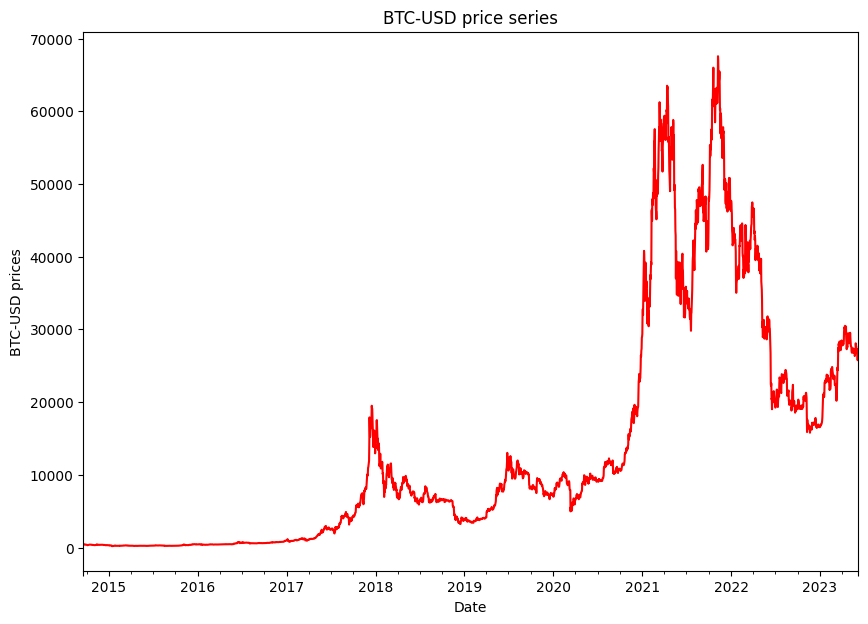

In [9]:
data.Close.plot(figsize = (10,7), color = 'r' )
plt.ylabel(f'{stocks} prices')
plt.title(f'{stocks} price series')
plt.show()

<Axes: xlabel='Close', ylabel='Count'>

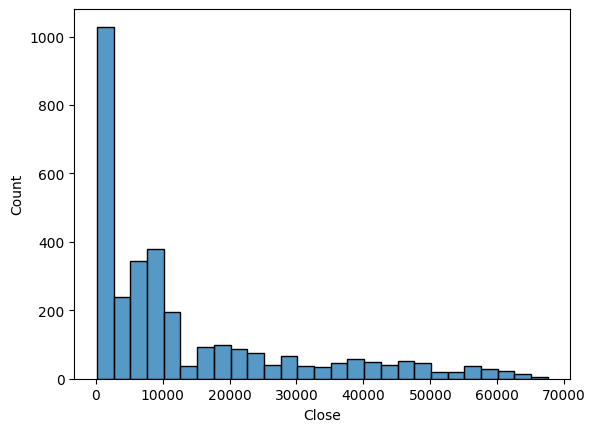

In [10]:
sns.histplot(data["Close"])

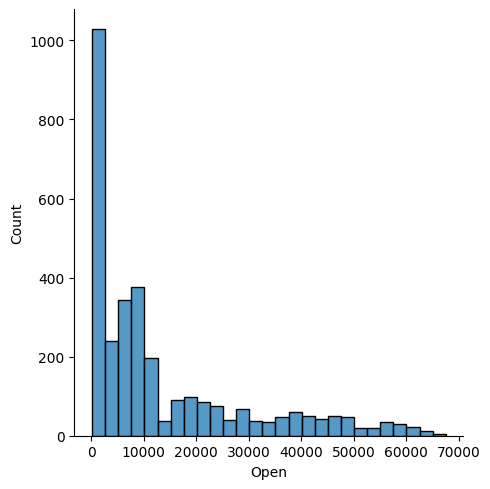

In [11]:
sns.displot(data["Open"])

In [12]:
X = data.drop("Close", axis = 1)
Y = data["Close"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2548, 4)
(638, 4)
(2548,)
(638,)


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
pred1 = lr.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

def calculate_metrics(Y_test,Y_pred):

  r2_scr = r2_score(Y_test,Y_pred)

  print(r2_scr)

calculate_metrics(Y_test,pred1)

0.9995139158928734


In [18]:
from sklearn.linear_model import Lasso, Ridge
la = Lasso().fit(X_train, Y_train)
ri = Ridge().fit(X_train, Y_train)
la_p = la.predict(X_test)
ri_p = ri.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+08, tolerance: 6.425e+07
  model = cd_fast.enet_coordinate_descent(


In [19]:
calculate_metrics(Y_test, la_p)
print()
calculate_metrics(Y_test, ri_p)# better

0.9992016093391968

0.9995139158916779
